In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist


# 1. 이미지 셋을 읽어오자
# 2. 이미지 전처리
## 1) 4차원을 만들어주세요=>
##    이미지셋 자체는 3차원: 이미지2차원 + 이미지 여러장
##    이미지 픽셀마다의 특성(특징)을 추출하는 처리를 하기 위한 차원 하나 더 추가
## 2) 데이터를 읽어왔을 때 픽셀 마다의 값의 명암정도만 가지고 있음(0~255)
##      0~1사이로 스케일링(표준화)시켜줌
##       다 255로 나누어주면 됨!!!
## 3) 이미지는 크기가 아주 다양함. 크기를 표준화
# 3. 특성 추출처리
# 4. 특성 추출한 결과를 학습데이터로 넣어서 학습할 예정
##     deep modeling
## 1) 특성추출한 이미지 데이터를 1차원으로 만들어주세요(Flatten())
## 2) 딥러닝 심층신경망(deep MLP)
## 3) fit()
# 5. 모델에 대해 평가
## 1) test데이터를 검증=> overfitting여부 확인!
## 2)시각화로 평가

In [2]:
#1.이미지를 읽어오자
#내장되어 있는 mnist이미지 다운
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [3]:
train_images[0].shape

(28, 28)

In [4]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:

test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
train_images, test_images = train_images / 255.0, test_images / 255.0 

In [9]:
## 3. 특성 추출처리 

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))


In [12]:
# 4.
#입력층
model.add(Flatten())
#히든층
model.add(Dense(64,activation='relu'))
#출력층
model.add(Dense(10, activation='softmax'))#카테고리 10개로 출력해줘(0부터9)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [14]:
#설정
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
#공부시켜보자
history = model.fit(train_images, train_labels, epochs=2, batch_size=100)
history

Epoch 1/2
600/600 [==============================] - 18s 29ms/step - loss: 0.2232 - accuracy: 0.9319
Epoch 2/2
600/600 [==============================] - 18s 29ms/step - loss: 0.0576 - accuracy: 0.9823


In [16]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
loss, acc

313/313 - 1s - loss: 0.0442 - accuracy: 0.9860 - 1s/epoch - 3ms/step


(0.04422050714492798, 0.9860000014305115)

In [17]:
y_pred = model.predict(test_images)
y_pred[0]

array([5.9946899e-07, 3.1803343e-06, 1.4796044e-05, 6.2806712e-04,
       3.1782026e-08, 1.6820918e-07, 1.7539919e-12, 9.9932241e-01,
       1.5692091e-05, 1.4989999e-05], dtype=float32)

In [18]:
import numpy as np

In [19]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index

7

In [20]:

y_pred_test = np.argmax(y_pred, axis= -1)
y_pred_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(test_labels, y_pred_test))
print(confusion_matrix(test_labels, y_pred_test))

0.986
[[ 977    0    1    0    0    0    0    1    1    0]
 [   0 1132    1    2    0    0    0    0    0    0]
 [   1    2 1022    2    1    0    0    3    1    0]
 [   1    0    2 1003    0    1    0    0    3    0]
 [   1    0    0    1  963    0    0    0    3   14]
 [   2    0    1    9    0  872    1    1    6    0]
 [   7    5    1    0    1    2  941    0    1    0]
 [   0    3   11    6    0    0    0 1001    2    5]
 [   4    0    3    1    1    1    0    2  961    1]
 [   1    2    0    4    1    1    0    4    8  988]]


In [23]:
type(confusion_matrix(test_labels, y_pred_test))

numpy.ndarray

In [24]:

result = confusion_matrix(test_labels, y_pred_test)
result.shape

(10, 10)

In [25]:
result[0][0], result[1][1]

(977, 1132)

In [26]:
result_acc = []
for x in range(0, 10):
    result_acc.append(result[x][x])
result_acc

[977, 1132, 1022, 1003, 963, 872, 941, 1001, 961, 988]

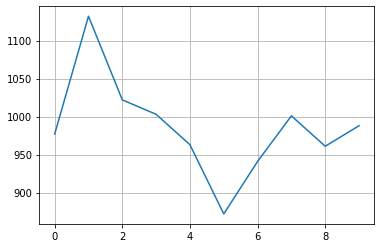

In [27]:
#각 숫자의 개수를 세어보자.(5가 가장 적음)
import matplotlib.pyplot as plt
plt.plot(result_acc)
plt.grid()
plt.show()

In [28]:
#각 글자의 개수를 세어보자
import pandas as pd
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [29]:
precision_score(test_labels, y_pred_test, average='weighted')

0.9860909477784062

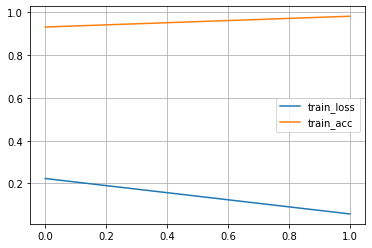

In [30]:
plt.plot(history.history['loss'])
#plt.plot(loss)
plt.plot(history.history['accuracy'])
#plt.plot(acc)
plt.legend(['train_loss', 'train_acc'])
plt.grid()
plt.show()